In [111]:
import time
import random
from k_merge_dyc import k_merge_dyc
from k_merge_heap import k_merge_heap
import matplotlib.pyplot as plt

In [155]:
CANTIDAD_ELEMENTOS_MAXIMA = 500
NUMERO_MAXIMO = 999
SALTOS = 10

In [156]:
def generar_arreglos_ordenados(n):
    lista_a = [random.randint(0, NUMERO_MAXIMO) for _ in range(n)]
    lista_b = [random.randint(0, NUMERO_MAXIMO) for _ in range(n)]
    lista_a.sort()
    lista_b.sort()
    return lista_a, lista_b

In [140]:
def generar_arreglos_por_cantidad():
    aux = []
    for i in range(CANTIDAD_ELEMENTOS_MAXIMA):
        aux.append(generar_arreglos_ordenados(i))
    return aux

In [148]:
def obtener_tiempos(cantidades, k_merge):
    tiempos = []
    arreglos = generar_arreglos_por_cantidad()
    
    for cant in cantidades:
        start_time = time.time()
        k_merge([arreglos[cant][0], arreglos[cant][1]])  
        end_time = time.time()
        tiempos.append(end_time - start_time)  
    
    return tiempos

In [157]:
def obtener_tiempos(cantidades, k_merge):
    tiempos = []
    lista_a, lista_b = generar_arreglos_ordenados(CANTIDAD_ELEMENTOS_MAXIMA)
    
    for cant in cantidades:
        start_time = time.time()
        k_merge([lista_a[:cant], lista_b[:cant]])  
        end_time = time.time()
        tiempos.append(end_time - start_time)  
    
    return tiempos

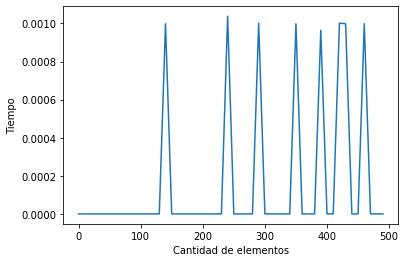

In [161]:
cantidades = [i for i in range(0, CANTIDAD_ELEMENTOS_MAXIMA, SALTOS)]
tiempos_dyc = obtener_tiempos(cantidades, k_merge_dyc)

plt.plot(cantidades, tiempos_dyc)
plt.xlabel('Cantidad de elementos')
plt.ylabel('Tiempo')
plt.show()


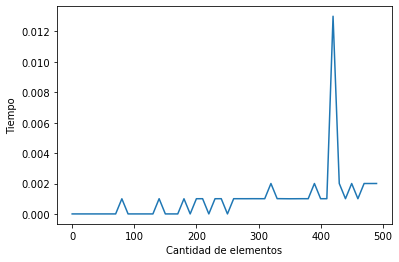

In [159]:
tiempos_heap = obtener_tiempos(cantidades, k_merge_heap)

plt.plot(cantidades, tiempos_heap)
plt.xlabel('Cantidad de elementos')
plt.ylabel('Tiempo')
plt.show()